# Практическая работа № 4

### Часть 1

Считаем изображение

In [69]:
from PIL import Image, ImageFilter
from scipy.ndimage import filters
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from scipy.ndimage import gaussian_filter
import math
from scipy.ndimage import measurements, morphology
from sklearn.cluster import KMeans
from scipy import ndimage as ndi
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
import cv2
from skimage import morphology, measure

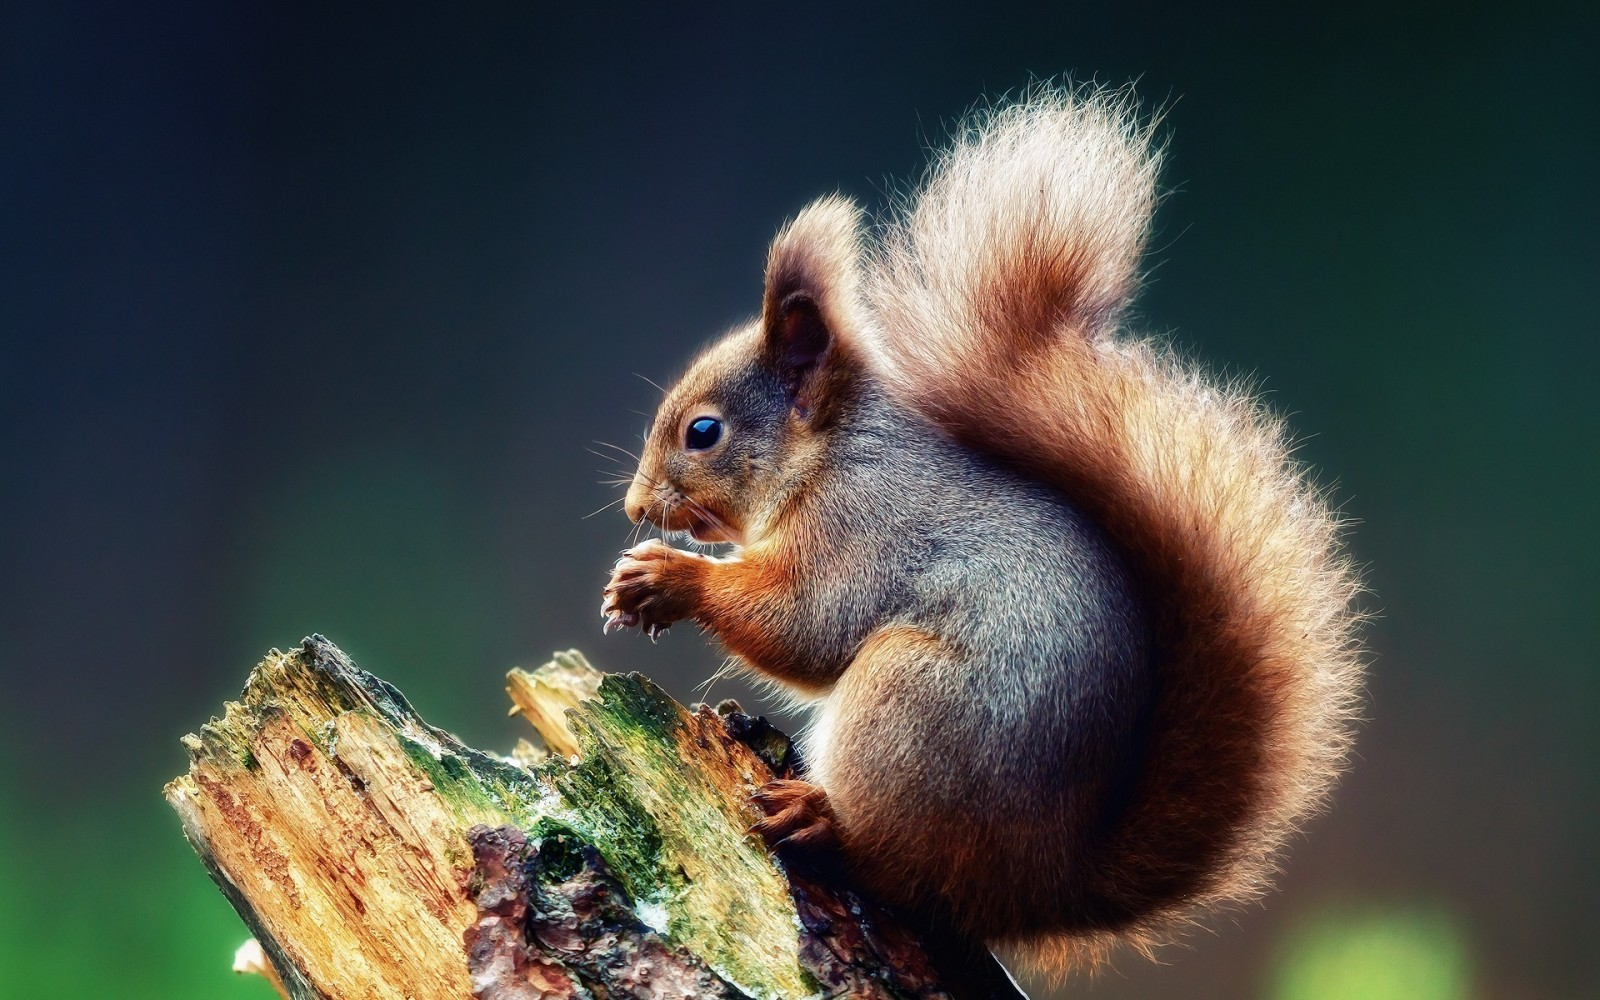

In [26]:
image_path = 'belka.jpg'
im = Image.open(image_path)
im

1. Выполните размытие изображения по Гауссу с произвольным значением . Нарисуйте изолинии для различных значений и сравните их.

In [27]:
# размытие по Гауссу с разными значениями
im8 = ndimage.gaussian_filter(im, sigma=5)[::-1]
im81 = ndimage.gaussian_filter(im, sigma=15)[::-1]
im82 = ndimage.gaussian_filter(im, sigma=30)[::-1]

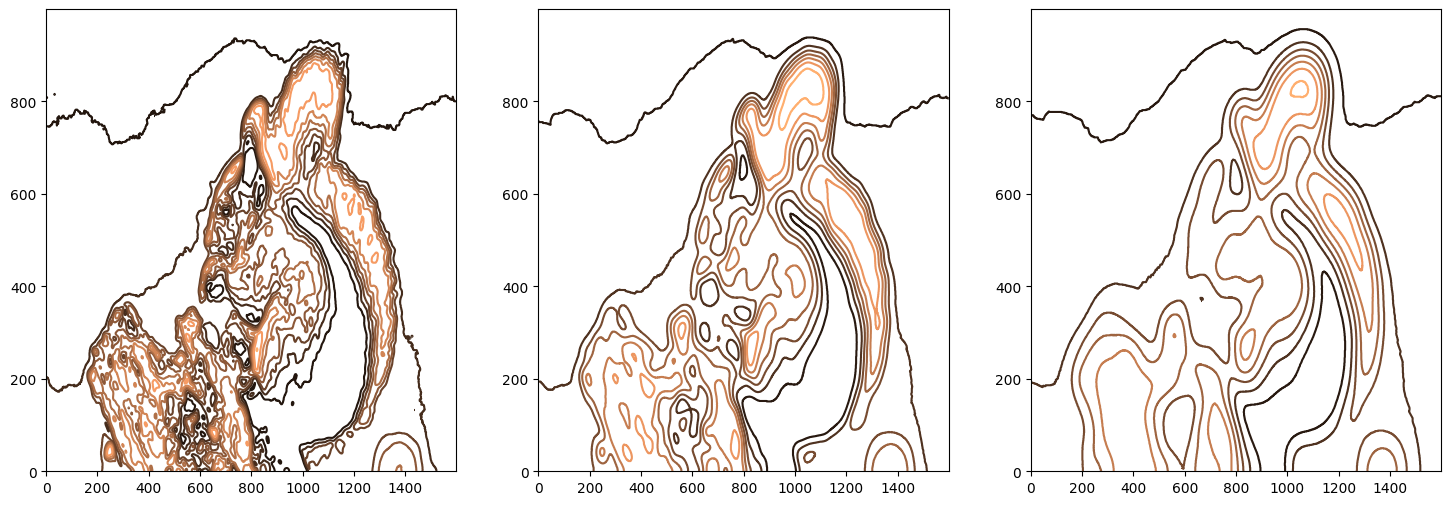

In [28]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.contour(im8[:,:,0], cmap='copper')
plt.subplot(1, 3, 2)
plt.contour(im81[:,:,0], cmap='copper')
plt.subplot(1, 3, 3)
plt.contour(im82[:,:,0], cmap='copper')
plt.show()

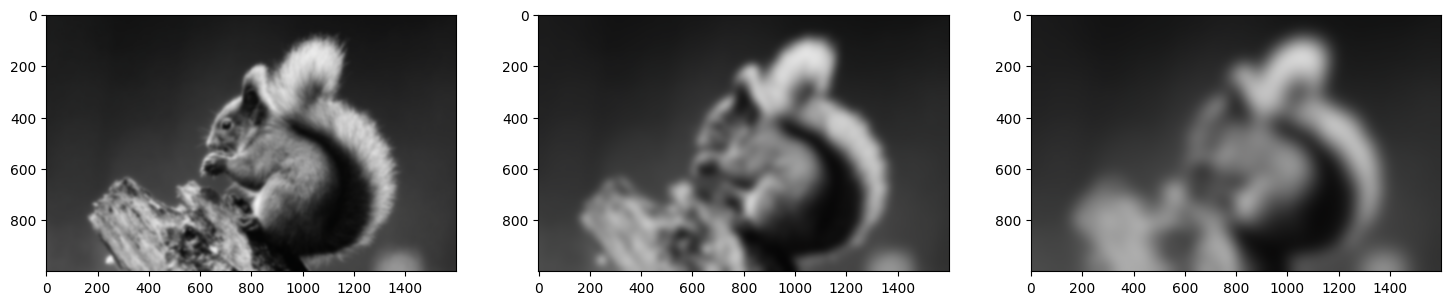

In [29]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(np.array(im8)[::-1], cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(np.array(im81)[::-1], cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(np.array(im82)[::-1], cmap="gray")
plt.show()

Произвели успешное размытие

2. Найдите границы изображения p1 c помощью фильтра Гаусса и операторов Собеля. Сравните результаты.

In [30]:
# границы c помощью фильтра Гаусса и операторов Собеля
im_array = np.array(im.convert('L'))

s = 5
imx = np.zeros(im_array.shape)
gaussian_filter(im_array, s, order=(0, 1), output=imx)
imy = np.zeros(im_array.shape)
gaussian_filter(im_array, s, order=(1, 0), output=imy)

magnitude = np.sqrt(imx**2 + imy**2)

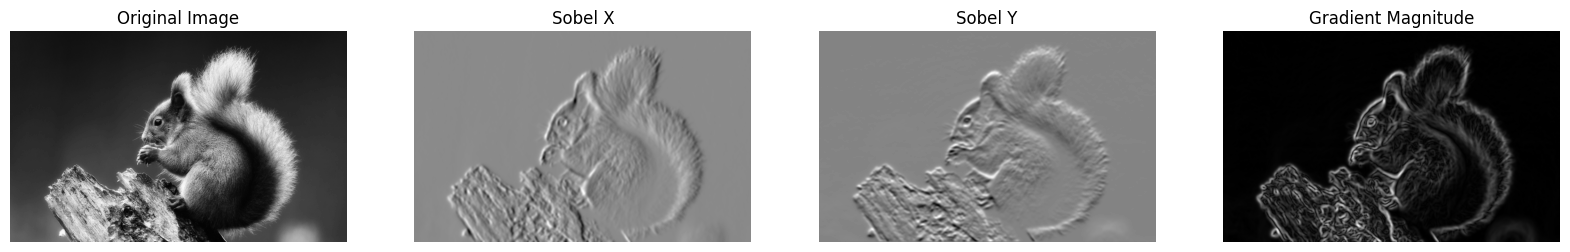

In [31]:
plt.figure(figsize=(20, 15))
plt.subplot(1, 4, 1)
plt.imshow(im_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(imx, cmap='gray')
plt.title('Sobel X')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(imy, cmap='gray')
plt.title('Sobel Y')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(magnitude, cmap='gray')
plt.title('Gradient Magnitude')
plt.axis('off')

plt.show()

Видим четкие границы

3. Бинаризируйте изображение p1. Вычислите количество разных объектов на нем. Воспользуйтесь функцией бинарного открытия, чтобы убрать перемычки между объектами.   Вычислите центры масс для найденных объектов.

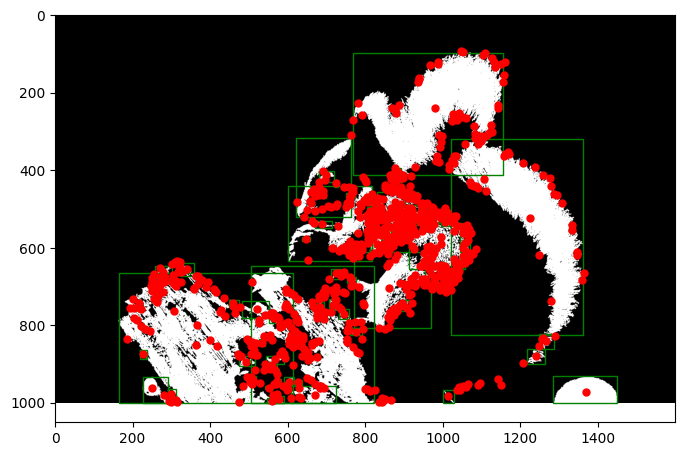

In [71]:
im_np = np.array(im)
gray = np.array(im.convert('L'))

threshold = 127
binary = gray > threshold

binary_opening = morphology.binary_opening(binary)

labels = measure.label(binary_opening)
regions = measure.regionprops(labels)

centers = []
for region in regions:
    centers.append(region.centroid)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(binary_opening, cmap='gray')

for region in regions:
    minr, minc, maxr, maxc = region.bbox
    rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                         fill=False, edgecolor='green', linewidth=1)
    ax.add_patch(rect)

for center in centers:
    ax.plot(center[1], center[0], 'ro', markersize=5)

plt.show()

4. Выполните операцию нерезкого маскирования для p1 (полутоновому и полутоновому и цветному): размойте p1, вычтите из исходного изображения размытое (полутоновому и должна увеличиться резкость).

In [36]:
imq = Image.open('belka.jpg')
imq_gray = imq.convert('L')
imq = np.array(imq)
imq_gray = np.array(imq_gray)

imq_blurred = filters.gaussian_filter(imq_gray, 5)
imq_sharp = 2 * imq_gray - imq_blurred

<ipython-input-36-312407bf33fa>:6: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  imq_blurred = filters.gaussian_filter(imq_gray, 5)


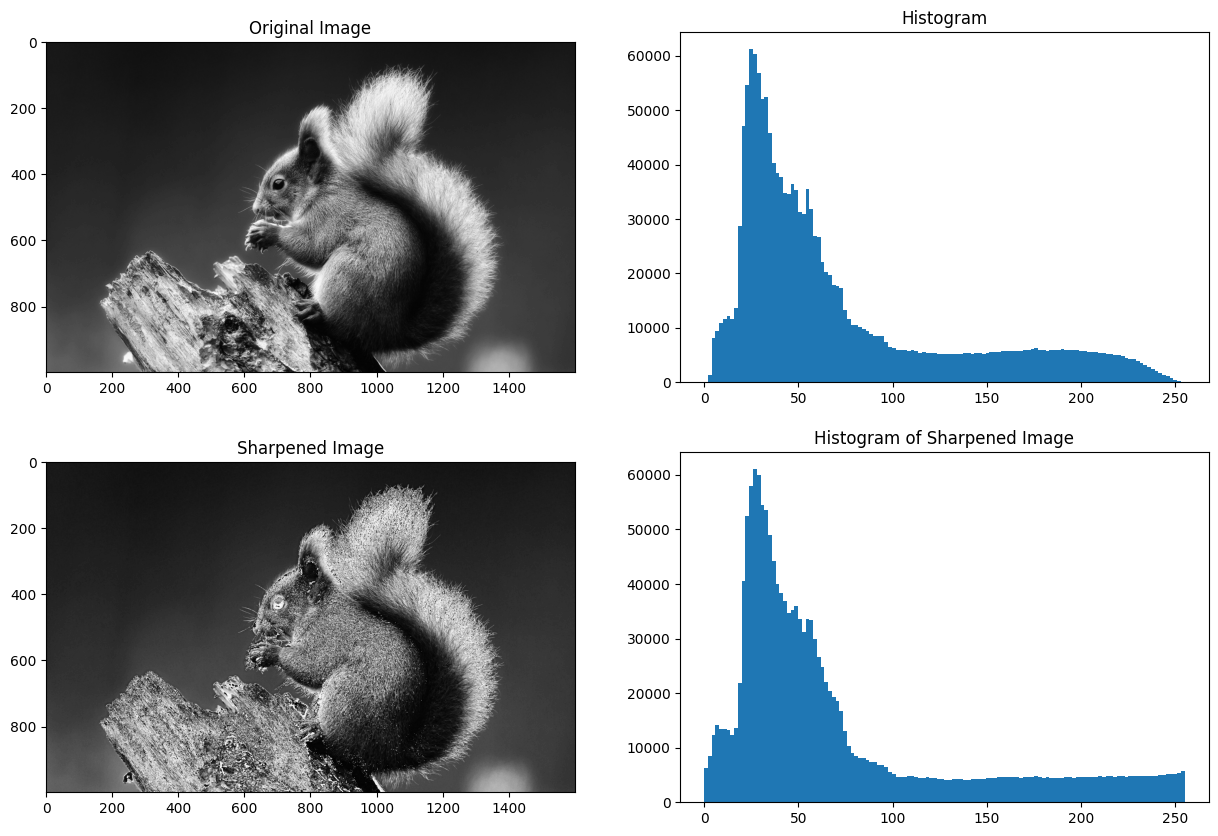

In [37]:
# полутоновое изображение
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.imshow(imq_gray, cmap='gray')
plt.title('Original Image')
plt.subplot(2, 2, 2)
plt.hist(imq_gray.flatten(), 128)
plt.title('Histogram')
plt.subplot(2, 2, 3)
plt.imshow(imq_sharp, cmap='gray')
plt.title('Sharpened Image')
plt.subplot(2, 2, 4)
plt.hist(imq_sharp.flatten(), 128)
plt.title('Histogram of Sharpened Image')
plt.show()

In [39]:
imq_blurred_color = np.zeros(imq.shape)
for i in range(3):
    imq_blurred_color[:, :, i] = filters.gaussian_filter(imq[:, :, i], 5)

imq_sharp_color = 2 * imq - imq_blurred_color

<ipython-input-39-01ee046d692e>:3: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  imq_blurred_color[:, :, i] = filters.gaussian_filter(imq[:, :, i], 5)


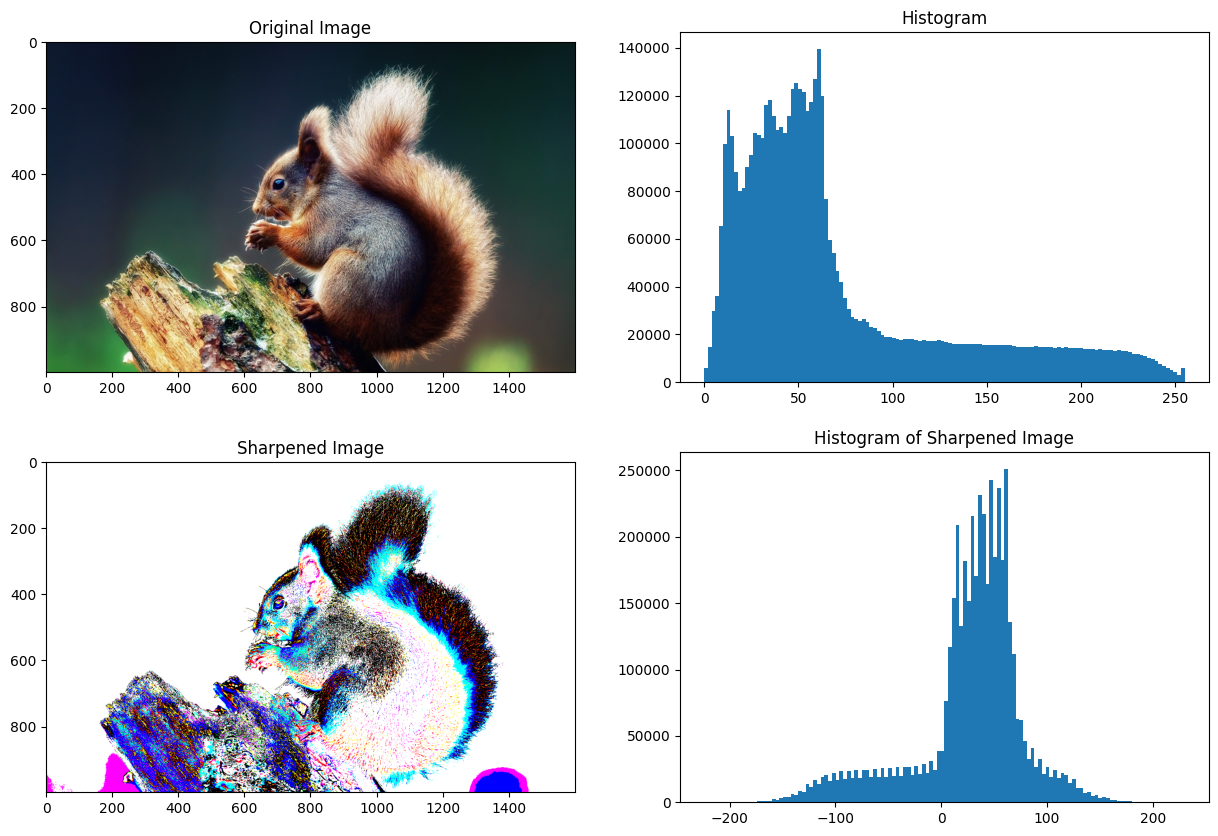

In [40]:
# цветное изображение
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.imshow(imq)
plt.title('Original Image')
plt.subplot(2, 2, 2)
plt.hist(imq.flatten(), 128)
plt.title('Histogram')
plt.subplot(2, 2, 3)
plt.imshow(imq_sharp_color)
plt.title('Sharpened Image')
plt.subplot(2, 2, 4)
plt.hist(imq_sharp_color.flatten(), 128)
plt.title('Histogram of Sharpened Image')
plt.show()

5. Сегментируйте изображение любыми двумя алгоритмами кластеризации.

In [45]:
im_np = np.array(im)
# преобразование изображения в одномерный массив для K-средних
im_flat = im_np.reshape((-1, 3))

num_clusters = 5

# алгоритм к-means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(im_flat)
labels_kmeans = kmeans.labels_
segmented_image_kmeans = labels_kmeans.reshape(im_np.shape[:2])

im_gray = im.convert('L')
im_gray_np = np.array(im_gray)

# лгоритм Watershed
distance = ndi.distance_transform_edt(im_gray_np)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)), labels=im_gray_np)
markers = ndi.label(local_maxi)[0]
labels_ws = watershed(-distance, markers, mask=im_gray_np)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-45-966cd44b0fc5>:22: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)), labels=im_gray_np)


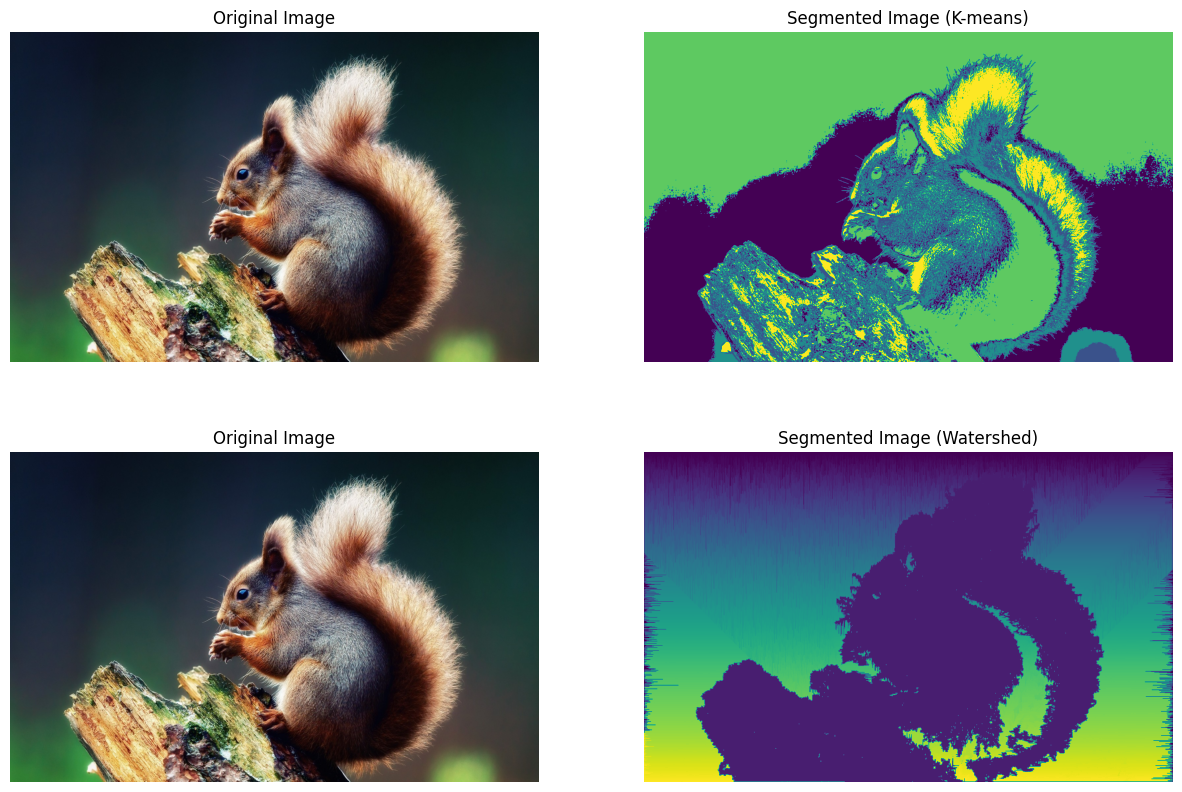

In [46]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(im)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(segmented_image_kmeans, cmap='viridis')
plt.title('Segmented Image (K-means)')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(im)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(labels_ws, cmap='viridis')
plt.title('Segmented Image (Watershed)')
plt.axis('off')

plt.show()

Использовала k-means и watershed, как видим алгоритм k-means справился лучше

### Часть 2

1. Для произвольного изображения применить поворот, растяжение и сжатие, сохранить полученные изображения.

In [59]:
# поворот на 45 градусов
rotated_image = im.rotate(45)

# растяжение вдоль горизонтальной оси
stretched_image = im.resize((int(im.width * 1.5), im.height))

# сжатие вдоль вертикальной оси
compressed_image = im.resize((im.width, int(im.height * 0.5)))

# сохранение
rotated_image.save("rotated_image.jpg")
stretched_image.save("stretched_image.jpg")
compressed_image.save("compressed_image.jpg")

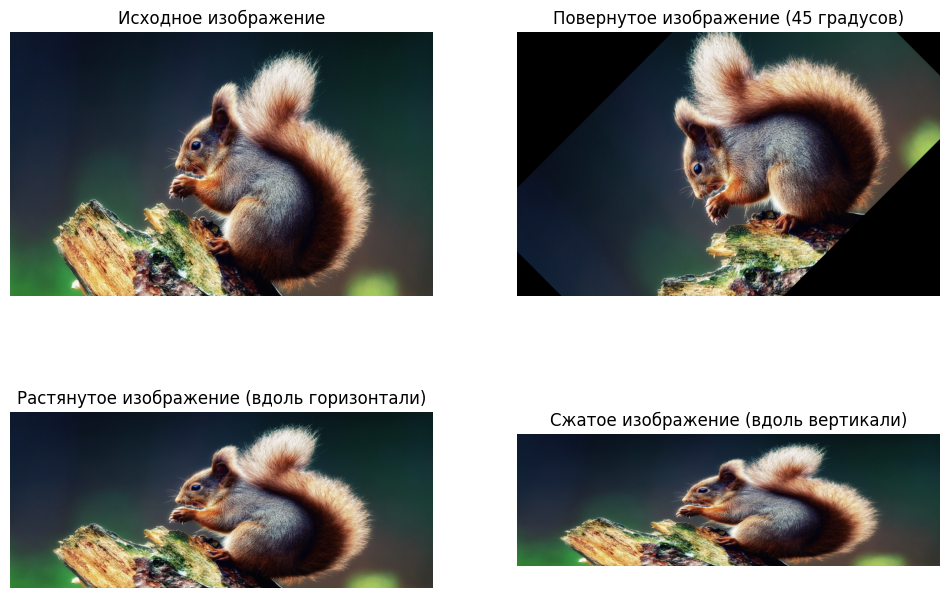

In [60]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(im)
plt.title('Исходное изображение')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(rotated_image)
plt.title('Повернутое изображение (45 градусов)')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(stretched_image)
plt.title('Растянутое изображение (вдоль горизонтали)')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(compressed_image)
plt.title('Сжатое изображение (вдоль вертикали)')
plt.axis('off')

plt.show()

2. Построить размытое, резкое изображение с помощью различных фильтров.

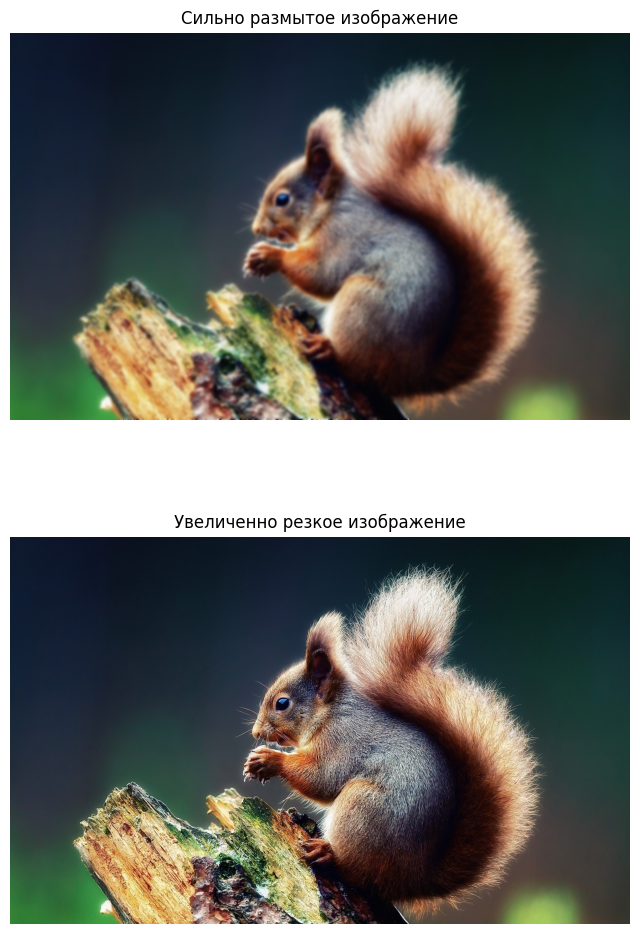

In [58]:
blurred_image = im.filter(ImageFilter.BLUR).filter(ImageFilter.BLUR).filter(ImageFilter.BLUR)
sharpened_image = im.filter(ImageFilter.SHARPEN)

plt.figure(figsize=(8, 12))

plt.subplot(2, 1, 1)
plt.imshow(blurred_image)
plt.title('Сильно размытое изображение')
plt.axis('off')

plt.subplot(2, 1, 2)
plt.imshow(sharpened_image)
plt.title('Увеличенно резкое изображение')
plt.axis('off')

# Показать графики
plt.show()

3. Найти углы с помощью детектора Харриса

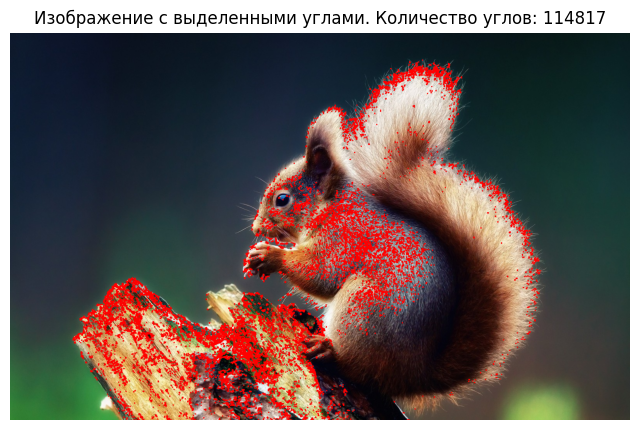

In [65]:
gray_image = cv2.cvtColor(np.array(im), cv2.COLOR_RGB2GRAY)

dst = cv2.cornerHarris(gray_image, 2, 3, 0.04)
dst = cv2.dilate(dst, None)

num_corners = np.sum(dst > 0.01 * dst.max())

im_with_corners = np.array(im)
im_with_corners[dst > 0.01 * dst.max()] = [255, 0, 0]

plt.figure(figsize=(8, 6))
plt.imshow(im_with_corners)
plt.title(f'Изображение с выделенными углами. Количество углов: {num_corners}')
plt.axis('off')
plt.show()

4. Найти области SIFT

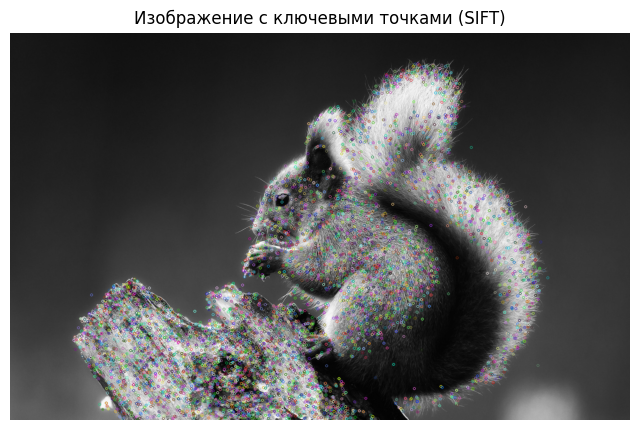

In [66]:
gray_image = cv2.cvtColor(np.array(im), cv2.COLOR_RGB2GRAY)

sift = cv2.SIFT_create()

keypoints, descriptors = sift.detectAndCompute(gray_image, None)
img_with_keypoints = cv2.drawKeypoints(gray_image, keypoints, None)

plt.figure(figsize=(8, 6))
plt.imshow(img_with_keypoints, cmap='gray')
plt.title('Изображение с ключевыми точками (SIFT)')
plt.axis('off')
plt.show()

5. Найти границы Canny

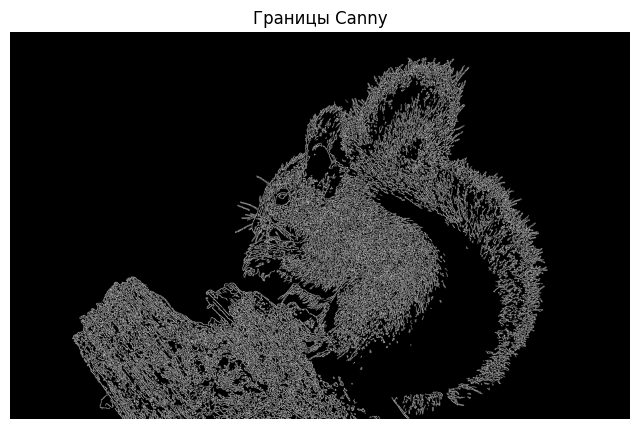

In [67]:
gray_image = cv2.cvtColor(np.array(im), cv2.COLOR_RGB2GRAY)

edges = cv2.Canny(gray_image, 100, 200)

plt.figure(figsize=(8, 6))
plt.imshow(edges, cmap='gray')
plt.title('Границы Canny')
plt.axis('off')
plt.show()

6. Построить результаты морфологических операций

Все результаты для каждой операции находятся в соответствующих ячейках выше - под каждой операцией свои построенные результаты